# Step 38

In [1]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.reshape(x, (6,))
y.backward(retain_grad=True)
print(x.grad)

variable([[1 1 1]
          [1 1 1]])


In [1]:
from dezero import Variable
import numpy as np
x = Variable(np.random.rand(2,3))
y = x.transpose()
y = x.T


In [2]:
y

variable([[0.00826873 0.90630807]
          [0.3626143  0.94167801]
          [0.99584578 0.32714422]])

In [3]:
x

variable([[0.00826873 0.3626143  0.99584578]
          [0.90630807 0.94167801 0.32714422]])

# Step 40

In [1]:
import numpy as np
from dezero import Variable

x0 = Variable(np.array([1,2,3]))
x1 = Variable(np.array([10]))
y = x0 + x1
print(y)

y.backward()
print(x1.grad)

variable([11 12 13])
variable([3])


# Step 41

In [2]:
from dezero import Variable
import dezero.functions as F
import numpy as np

x = Variable(np.random.randn(2, 3))
W = Variable(np.random.randn(3, 4))
y = F.matmul(x, W)
y.backward()

print(x.grad.shape)
print(W.grad.shape)

(2, 3)
(3, 4)


# Step 42

In [3]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

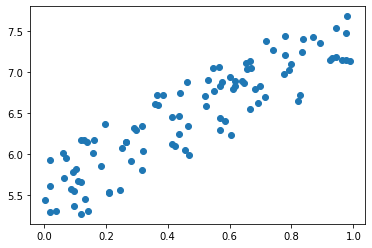

In [5]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

In [1]:
from dezero import Variable
import dezero.functions as F
import numpy as np

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

In [3]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)

variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.5542803813535926)
variable([[2.21482401]]) variable([4.52705574]) variable(1.4925998690471942)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756932)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227453)
variable([[2.39573972]]) variable([4.9467725]) variable(0.35859153083192785)
variable([[2.425382]]) variable([5.02561369]) variable(0.2491573197756112)
variable([[2.44575118]]) variable([5.08588371]) variable(0.18690658765397886)
variable([[2.45917205]]) variable([5.13217364]) variable(0.15135336296314875)
variable([[2.4673927]]) variable([5.16793652]) variable(0.13091003006317078)
varia

# Step 43

In [5]:
import numpy as np
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100,1)

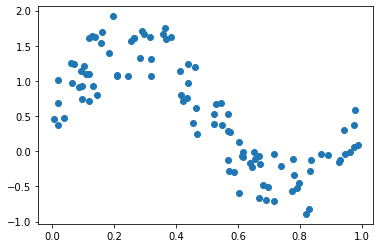

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

In [1]:
import numpy as np
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 1000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)

NameError: name 'cuda' is not defined

# Step 45

In [ ]:
from dezero.layers as L
import dezero.functions as F
from dezero import Layer

model = Layer()
model.l1 = L.Linear(5)
model.l2 = L.Linear(3)

def predict(model, x):
    y = model.l1(x)
    y = F.sigmoid(y)
    y = model.l2(y)
    return y

for p in model.params():
    print(p)
    
model.cleargrad()

In [ ]:
class TwoLayerNet(Layer):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x):
        y = F.sigmoid(self, l1(x))
        y = self.l2(y)
        return y
    

In [ ]:
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size): #input size is defined by input data
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
    
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y
    
x = Variable(np.random.randn(5, 10), name='x')
model = TwoLayerNet(100, 10) 
model.plot(x)



In [ ]:
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)
lr = 0.2
max_iter = 10000
hidden_size = 10

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y
    
model = TwoLayerNet(hissen_size, 1)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    
    model.cleargrad()
    loss.backward()
    
    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)
        
        

# Step 46

In [ ]:
import numpy as np
from dezero import Variable
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    
    model.cleargrads()
    loss.backward()
    
    optimizer.update()
    if i % 1000 == 0:
        print(loss)